<a href="https://colab.research.google.com/github/bhoomika-7599/data/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME']='bhoomikaraj'
os.environ['KAGGLE_KEY']='11a69550ca3140eb66bd6d3a8ec1dda2'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:02<00:00, 59.8MB/s]
100% 207M/207M [00:02<00:00, 74.4MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
valid_dir = os.path.join(main_dir, 'Validation')

train_mask_dir= os.path.join(train_dir, 'Mask')
train_nomask_dir= os.path.join(train_dir, 'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])


['0838.jpg', '0988.jpg', '0862.jpg', '0498.jpg', '1568.jpg', '0639.jpg', '0197.png', '1635.jpg', '0626.jpg', '1562.jpg']
['104.jpg', '162.jpg', '336.jpg', '292.jpg', '188.jpg', '52.jpg', '16.jpg', '67.jpg', '322.jpg', '244.jpg']


['/content/New Masks Dataset/Train/Mask/0838.jpg', '/content/New Masks Dataset/Train/Mask/0988.jpg', '/content/New Masks Dataset/Train/Mask/0862.jpg', '/content/New Masks Dataset/Train/Mask/0498.jpg', '/content/New Masks Dataset/Train/Mask/1568.jpg', '/content/New Masks Dataset/Train/Mask/0639.jpg', '/content/New Masks Dataset/Train/Mask/0197.png', '/content/New Masks Dataset/Train/Mask/1635.jpg']
['/content/New Masks Dataset/Train/Non Mask/104.jpg', '/content/New Masks Dataset/Train/Non Mask/162.jpg', '/content/New Masks Dataset/Train/Non Mask/336.jpg', '/content/New Masks Dataset/Train/Non Mask/292.jpg', '/content/New Masks Dataset/Train/Non Mask/188.jpg', '/content/New Masks Dataset/Train/Non Mask/52.jpg', '/content/New Masks Dataset/Train/Non Mask/16.jpg', '/content/New Masks Dataset/Train/Non Mask/67.jpg']


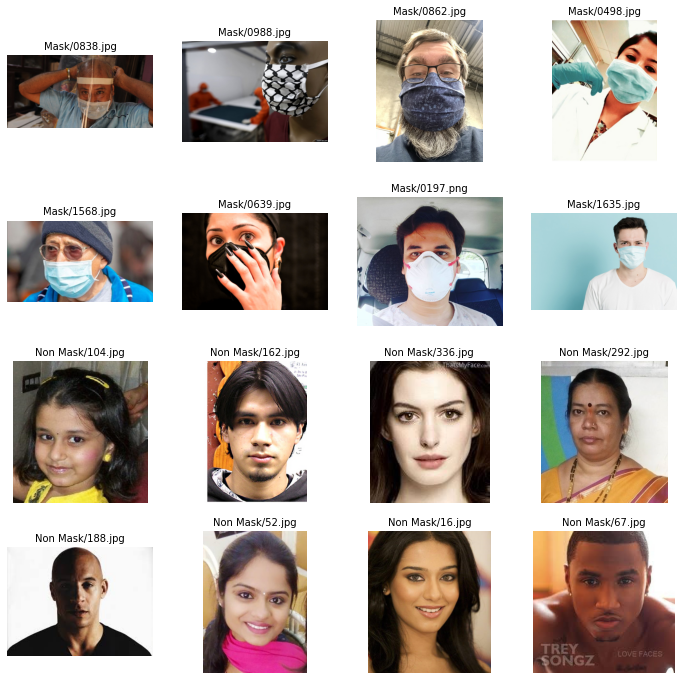

In [7]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))
mask_pic= []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)   
merged_list = mask_pic+ nomask_pic
for i in range(0, len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image= mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()  

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale= 1./255)
validation_datagen = ImageDataGenerator(rescale= 1./255)
train_generator  = train_datagen.flow_from_directory (train_dir,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='binary'
)
test_generator  = test_datagen.flow_from_directory (test_dir,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='binary'
)
valid_generator  = validation_datagen.flow_from_directory (valid_dir,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

In [11]:
model= Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               46080256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
history=model.fit(train_generator,
                  epochs=30,
                  validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 45s 675ms/step - loss: 6.3424 - accuracy: 0.5412 - val_loss: 1.0291 - val_accuracy: 0.6242
Epoch 2/30
19/19 [==============================] - 12s 647ms/step - loss: 0.7610 - accuracy: 0.6991 - val_loss: 0.4156 - val_accuracy: 0.8039
Epoch 3/30
19/19 [==============================] - 12s 643ms/step - loss: 0.3484 - accuracy: 0.8801 - val_loss: 0.2618 - val_accuracy: 0.9085
Epoch 4/30
19/19 [==============================] - 12s 647ms/step - loss: 0.3199 - accuracy: 0.8697 - val_loss: 0.2414 - val_accuracy: 0.8987
Epoch 5/30
19/19 [==============================] - 12s 654ms/step - loss: 0.2313 - accuracy: 0.9183 - val_loss: 0.2364 - val_accuracy: 0.8954
Epoch 6/30
19/19 [==============================] - 12s 653ms/step - loss: 0.2702 - accuracy: 0.8979 - val_loss: 0.2247 - val_accuracy: 0.8954
Epoch 7/30
19/19 [==============================] - 12s 648ms/step - loss: 0.1733 - accuracy: 0.9431 - val_loss: 0.2463 - val_accuracy: 0.8791

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

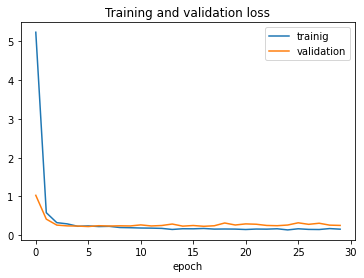

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

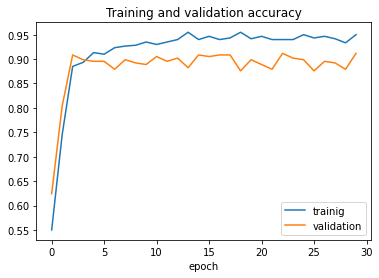

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [29]:
test_loss, test_acc=model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 276ms/step - loss: 0.1214 - accuracy: 0.9600
test loss:0.12135276943445206 test acc:0.9599999785423279


In [30]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path= '/content/'+fname
  img=image.load_img(img_path, target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction ==0:
    print('mask')
  else:
    print('no mask')

Saving mask.jpg to mask (2).jpg
Saving no_mask.jpg to no_mask (2).jpg
mask.jpg
mask
no_mask.jpg
no mask


In [31]:
model.save('model.h5')